## Kaggle Competition for House Prices: Advanced Regression Techniques 

In [1]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

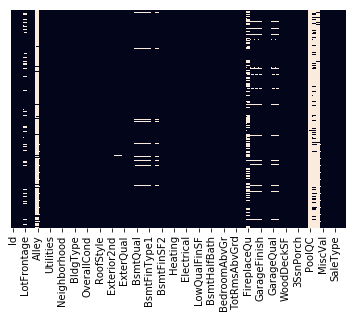

In [5]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [6]:
df.shape

(1460, 81)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [8]:
## Fill Missing Values

df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].mean())

In [9]:
df.drop(['Alley'],axis=1,inplace=True)

In [10]:
df['BsmtCond']=df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtQual']=df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])

In [11]:
df['FireplaceQu']=df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])
df['GarageType']=df['GarageType'].fillna(df['GarageType'].mode()[0])

In [12]:
df.drop(['GarageYrBlt'],axis=1,inplace=True)

In [13]:
df['GarageFinish']=df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageQual']=df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond']=df['GarageCond'].fillna(df['GarageCond'].mode()[0])

In [14]:
df.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [15]:
df.shape

(1460, 76)

In [16]:
df.drop(['Id'],axis=1,inplace=True)

In [17]:
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 75, dtype: int64

In [18]:
df['MasVnrType']=df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['MasVnrArea']=df['MasVnrArea'].fillna(df['MasVnrArea'].mode()[0])

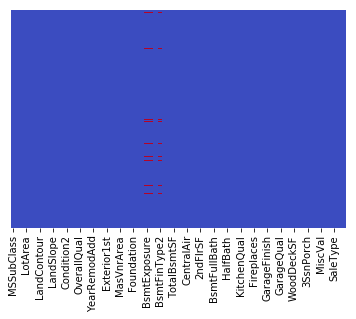

In [19]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

In [20]:
df['BsmtExposure']=df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])

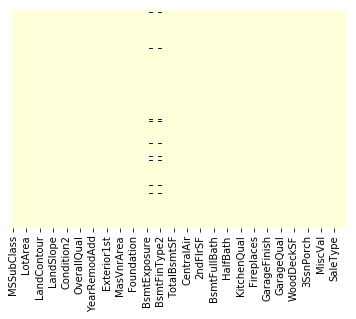

In [21]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu')

In [22]:
df['BsmtFinType2']=df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])

In [23]:
df.dropna(inplace=True)

In [24]:
df.shape

(1422, 75)

In [25]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [26]:
##HAndle Categorical Features

In [27]:
columns=['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
         'Condition2','BldgType','Condition1','HouseStyle','SaleType',
        'SaleCondition','ExterCond',
         'ExterQual','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
        'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Heating','HeatingQC',
         'CentralAir',
         'Electrical','KitchenQual','Functional',
         'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive']

In [28]:
len(columns)

39

In [29]:
def category_onehot_multcols(multcolumns):
    df_final=final_df
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([final_df,df_final],axis=1)
        
    return df_final

In [30]:
main_df=df.copy()

In [31]:
## Combine Test Data 

test_df=pd.read_csv('formulatedtest.csv')

In [32]:
test_df.shape

(1459, 74)

In [33]:
test_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,120,0,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,34,0,0,0,0,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,36,0,0,0,0,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,82,0,0,144,0,0,1,2010,WD,Normal


In [34]:
final_df=pd.concat([df,test_df],axis=0)

C:\Users\SHIVAM SINGH\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [35]:
final_df['SalePrice']

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1454         NaN
1455         NaN
1456         NaN
1457         NaN
1458         NaN
Name: SalePrice, Length: 2881, dtype: float64

In [36]:
final_df.shape

(2881, 75)

In [37]:
final_df=category_onehot_multcols(columns)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition2
BldgType
Condition1
HouseStyle
SaleType
SaleCondition
ExterCond
ExterQual
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive


In [38]:
final_df.shape

(2881, 235)

In [39]:
final_df =final_df.loc[:,~final_df.columns.duplicated()]

In [40]:
final_df.shape

(2881, 175)

In [41]:
final_df

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,856,854,0,3,706.0,0.0,1.0,0.0,150.0,0,...,0,0,1,1,0,0,0,0,1,0
1,1262,0,0,3,978.0,0.0,0.0,1.0,284.0,0,...,0,0,1,1,0,0,0,0,1,0
2,920,866,0,3,486.0,0.0,1.0,0.0,434.0,0,...,0,0,1,1,0,0,0,0,1,0
3,961,756,0,3,216.0,0.0,1.0,0.0,540.0,272,...,0,0,1,0,0,0,0,1,0,0
4,1145,1053,0,4,655.0,0.0,1.0,0.0,490.0,0,...,0,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,546,546,0,3,0.0,0.0,0.0,0.0,546.0,0,...,0,0,1,1,0,0,0,0,0,0
1455,546,546,0,3,252.0,0.0,0.0,0.0,294.0,0,...,0,0,1,0,0,0,1,0,0,0
1456,1224,0,0,4,1224.0,0.0,1.0,0.0,0.0,0,...,0,0,1,0,0,0,0,1,0,0
1457,970,0,0,3,337.0,0.0,0.0,1.0,575.0,0,...,0,0,1,1,0,0,0,0,0,0


In [42]:
df_Train=final_df.iloc[:1422,:]
df_Test=final_df.iloc[1422:,:]

In [43]:
df_Train.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,856,854,0,3,706.0,0.0,1.0,0.0,150.0,0,...,0,0,1,1,0,0,0,0,1,0
1,1262,0,0,3,978.0,0.0,0.0,1.0,284.0,0,...,0,0,1,1,0,0,0,0,1,0
2,920,866,0,3,486.0,0.0,1.0,0.0,434.0,0,...,0,0,1,1,0,0,0,0,1,0
3,961,756,0,3,216.0,0.0,1.0,0.0,540.0,272,...,0,0,1,0,0,0,0,1,0,0
4,1145,1053,0,4,655.0,0.0,1.0,0.0,490.0,0,...,0,0,1,1,0,0,0,0,1,0


In [44]:
df_Test.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,896,0,0,2,468.0,144.0,0.0,0.0,270.0,0,...,0,0,1,1,0,0,0,0,0,0
1,1329,0,0,3,923.0,0.0,0.0,0.0,406.0,0,...,0,0,1,1,0,0,0,0,0,0
2,928,701,0,3,791.0,0.0,0.0,0.0,137.0,0,...,0,0,1,1,0,0,0,0,0,0
3,926,678,0,3,602.0,0.0,0.0,0.0,324.0,0,...,0,0,1,1,0,0,0,0,0,0
4,1280,0,0,2,263.0,0.0,0.0,0.0,1017.0,0,...,0,0,1,1,0,0,0,0,1,0


In [45]:
df_Train.shape

(1422, 175)

In [46]:
df_Test.drop(['SalePrice'],axis=1,inplace=True)

C:\Users\SHIVAM SINGH\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [47]:
X_train=df_Train.drop(['SalePrice'],axis=1)
y_train=df_Train['SalePrice']


## Prediciton and selecting the Algorithm

In [48]:
import xgboost
classifier=xgboost.XGBRegressor()

In [49]:
import xgboost
regressor=xgboost.XGBRegressor()

In [50]:
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]

In [51]:
## Hyper Parameter Optimization


n_estimators = [100, 500, 800, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [52]:
from sklearn.model_selection import RandomizedSearchCV

In [53]:
# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=10, n_iter=200,
            scoring = 'neg_mean_absolute_error',n_jobs = 5,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [54]:
random_cv.fit(X_train,y_train)

Fitting 10 folds for each of 200 candidates, totalling 2000 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:   26.1s
[Parallel(n_jobs=5)]: Done  62 tasks      | elapsed:  3.6min
[Parallel(n_jobs=5)]: Done 152 tasks      | elapsed: 10.1min
[Parallel(n_jobs=5)]: Done 278 tasks      | elapsed: 17.3min
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed: 26.7min
[Parallel(n_jobs=5)]: Done 638 tasks      | elapsed: 35.9min
[Parallel(n_jobs=5)]: Done 872 tasks      | elapsed: 57.2min
[Parallel(n_jobs=5)]: Done 1142 tasks      | elapsed: 80.7min
[Parallel(n_jobs=5)]: Done 1448 tasks      | elapsed: 99.7min
[Parallel(n_jobs=5)]: Done 1790 tasks      | elapsed: 124.3min
[Parallel(n_jobs=5)]: Done 2000 out of 2000 | elapsed: 137.8min finished
C:\Users\SHIVAM SINGH\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change 

[23:12:38] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
          estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1),
          fit_params=None, iid='warn', n_iter=200, n_jobs=5,
          param_distributions={'n_estimators': [100, 500, 800, 1100, 1500], 'max_depth': [2, 3, 5, 10, 15], 'learning_rate': [0.05, 0.1, 0.15, 0.2], 'min_child_weight': [1, 2, 3, 4], 'booster': ['gbtree', 'gblinear'], 'base_score': [0.25, 0.5, 0.75, 1]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score=True, scoring='neg_mean_absolute_error',
          verbose=5)

In [56]:
random_cv.best_estimator_

XGBRegressor(base_score=1, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.05, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=800,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [58]:
random_cv.best_estimator_

XGBRegressor(base_score=1, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.05, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=800,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [59]:
regressor=xgboost.XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=900,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [60]:
regressor.fit(X_train,y_train)

XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=900,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1, verbosity=1)

In [61]:
import pickle
filename = 'finalized_model.pkl'
pickle.dump(classifier, open(filename, 'wb'))

In [62]:
df_Test.shape

(1459, 174)

In [64]:
df_Test.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,896,0,0,2,468.0,144.0,0.0,0.0,270.0,0,...,0,0,1,1,0,0,0,0,0,0
1,1329,0,0,3,923.0,0.0,0.0,0.0,406.0,0,...,0,0,1,1,0,0,0,0,0,0
2,928,701,0,3,791.0,0.0,0.0,0.0,137.0,0,...,0,0,1,1,0,0,0,0,0,0
3,926,678,0,3,602.0,0.0,0.0,0.0,324.0,0,...,0,0,1,1,0,0,0,0,0,0
4,1280,0,0,2,263.0,0.0,0.0,0.0,1017.0,0,...,0,0,1,1,0,0,0,0,1,0


In [65]:
y_pred=regressor.predict(df_Test)

In [66]:
y_pred

array([117275.625, 163568.39 , 188306.14 , ..., 181178.69 , 115435.21 ,
       236526.36 ], dtype=float32)

In [67]:
##Create Sample Submission file and Submit using ANN
pred=pd.DataFrame(y_pred)
sub_df=pd.read_csv('sample_submission.csv')
datasets=pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id','SalePrice']
datasets.to_csv('final_submission_work.csv',index=False)

## Step2

In [68]:
X_train=df_Train.drop(['SalePrice'],axis=1)
y_train=df_Train['SalePrice']

## Artificial Neural Network Implementation

In [70]:
#import tensorflow as tf

In [73]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout
from keras import optimizers


# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 40, init = 'he_uniform',activation='relu',input_dim = 174))

# Adding the second hidden layer
classifier.add(Dense(output_dim = 15, init = 'he_uniform',activation='relu'))

# Adding the third hidden layer
classifier.add(Dense(output_dim = 20, init = 'he_uniform',activation='relu'))

# Adding the forth hidden layer
classifier.add(Dense(output_dim = 20, init = 'he_uniform',activation='relu'))

# Adding the fifth hidden layer
classifier.add(Dense(output_dim = 20, init = 'he_uniform',activation='relu'))


# Adding the sixth hidden layer
classifier.add(Dense(output_dim = 50, init = 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'he_uniform'))

#keras.optimizers.Adamax(learning_rate=0.002, beta_1=0.9, beta_2=0.999, amsgrad=False)

#adam = optimizers.Adam(lr=0.01, beta_1=0.9,)
# Compiling the ANN
classifier.compile(loss='mean_absolute_error', optimizer='Adam')

# Fitting the ANN to the Training set
model_history=classifier.fit(X_train.values, y_train.values,validation_split=0.30, batch_size = 30, nb_epoch = 3000)

C:\Users\SHIVAM SINGH\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=174, units=40, kernel_initializer="he_uniform")`
  
C:\Users\SHIVAM SINGH\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=15, kernel_initializer="he_uniform")`
C:\Users\SHIVAM SINGH\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=20, kernel_initializer="he_uniform")`
C:\Users\SHIVAM SINGH\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=20, kernel_initializer="he_uniform")`
C:\Users\SHIVAM SINGH\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=

Train on 995 samples, validate on 427 samples
Epoch 1/3000
995/995 [==============================] - 1s 1ms/step - loss: 184068.3304 - val_loss: 181146.1228
Epoch 2/3000
995/995 [==============================] - 0s 149us/step - loss: 181740.9301 - val_loss: 174000.1387
Epoch 3/3000
995/995 [==============================] - 0s 145us/step - loss: 143212.3915 - val_loss: 58374.7421
Epoch 4/3000
995/995 [==============================] - 0s 145us/step - loss: 54339.2176 - val_loss: 44072.5038
Epoch 5/3000
995/995 [==============================] - 0s 137us/step - loss: 47496.7208 - val_loss: 41019.0869
Epoch 6/3000
995/995 [==============================] - 0s 145us/step - loss: 42467.3220 - val_loss: 38116.5616
Epoch 7/3000
995/995 [==============================] - 0s 145us/step - loss: 38362.1733 - val_loss: 35666.5049
Epoch 8/3000
995/995 [==============================] - 0s 145us/step - loss: 34925.9703 - val_loss: 33708.7853
Epoch 9/3000
995/995 [==============================] -

Epoch 73/3000
995/995 [==============================] - 0s 149us/step - loss: 23379.6897 - val_loss: 27332.8201
Epoch 74/3000
995/995 [==============================] - 0s 128us/step - loss: 23445.7265 - val_loss: 27867.5724
Epoch 75/3000
995/995 [==============================] - 0s 141us/step - loss: 23383.1604 - val_loss: 26602.2394
Epoch 76/3000
995/995 [==============================] - 0s 132us/step - loss: 23247.5813 - val_loss: 27019.5410
Epoch 77/3000
995/995 [==============================] - 0s 120us/step - loss: 23587.5654 - val_loss: 31996.9311
Epoch 78/3000
995/995 [==============================] - 0s 132us/step - loss: 23855.7186 - val_loss: 27110.9903
Epoch 79/3000
995/995 [==============================] - 0s 141us/step - loss: 23154.6124 - val_loss: 26667.5426
Epoch 80/3000
995/995 [==============================] - 0s 128us/step - loss: 23102.2298 - val_loss: 26626.3295
Epoch 81/3000
995/995 [==============================] - 0s 153us/step - loss: 23117.7969 - val_

995/995 [==============================] - 0s 149us/step - loss: 21461.0300 - val_loss: 28150.9389
Epoch 146/3000
995/995 [==============================] - 0s 137us/step - loss: 22452.1031 - val_loss: 25829.4041
Epoch 147/3000
995/995 [==============================] - 0s 120us/step - loss: 21564.2236 - val_loss: 25809.7137
Epoch 148/3000
995/995 [==============================] - 0s 137us/step - loss: 21279.3373 - val_loss: 25862.9335
Epoch 149/3000
995/995 [==============================] - 0s 128us/step - loss: 21337.8496 - val_loss: 25915.2313
Epoch 150/3000
995/995 [==============================] - 0s 128us/step - loss: 21328.3456 - val_loss: 26232.1237
Epoch 151/3000
995/995 [==============================] - 0s 141us/step - loss: 22934.9121 - val_loss: 25875.3199
Epoch 152/3000
995/995 [==============================] - 0s 132us/step - loss: 21323.2938 - val_loss: 25823.2653
Epoch 153/3000
995/995 [==============================] - 0s 128us/step - loss: 21533.7878 - val_loss: 

Epoch 217/3000
995/995 [==============================] - 0s 124us/step - loss: 19734.4660 - val_loss: 24962.3270
Epoch 218/3000
995/995 [==============================] - 0s 153us/step - loss: 19766.0564 - val_loss: 24802.5084
Epoch 219/3000
995/995 [==============================] - 0s 128us/step - loss: 20406.9641 - val_loss: 26550.8198
Epoch 220/3000
995/995 [==============================] - 0s 132us/step - loss: 20176.4304 - val_loss: 25231.6993
Epoch 221/3000
995/995 [==============================] - 0s 120us/step - loss: 19503.5755 - val_loss: 24636.0739
Epoch 222/3000
995/995 [==============================] - 0s 141us/step - loss: 19689.0044 - val_loss: 25188.9393
Epoch 223/3000
995/995 [==============================] - 0s 132us/step - loss: 19864.3923 - val_loss: 24944.7827
Epoch 224/3000
995/995 [==============================] - 0s 137us/step - loss: 19310.6205 - val_loss: 26451.5139
Epoch 225/3000
995/995 [==============================] - 0s 141us/step - loss: 19630.20

995/995 [==============================] - 0s 153us/step - loss: 18542.4548 - val_loss: 23529.0553
Epoch 289/3000
995/995 [==============================] - 0s 153us/step - loss: 18216.7980 - val_loss: 23850.2551
Epoch 290/3000
995/995 [==============================] - 0s 165us/step - loss: 17627.4328 - val_loss: 24591.7583
Epoch 291/3000
995/995 [==============================] - 0s 149us/step - loss: 18723.3442 - val_loss: 24536.4250
Epoch 292/3000
995/995 [==============================] - 0s 141us/step - loss: 18702.3564 - val_loss: 23687.6429
Epoch 293/3000
995/995 [==============================] - 0s 157us/step - loss: 18605.5815 - val_loss: 23680.1470
Epoch 294/3000
995/995 [==============================] - 0s 141us/step - loss: 17583.0719 - val_loss: 24501.2053
Epoch 295/3000
995/995 [==============================] - 0s 141us/step - loss: 18568.2799 - val_loss: 24228.7064
Epoch 296/3000
995/995 [==============================] - 0s 157us/step - loss: 17918.4107 - val_loss: 

Epoch 360/3000
995/995 [==============================] - 0s 124us/step - loss: 17174.3765 - val_loss: 23415.6632
Epoch 361/3000
995/995 [==============================] - 0s 145us/step - loss: 17016.1139 - val_loss: 22190.0841
Epoch 362/3000
995/995 [==============================] - 0s 128us/step - loss: 16018.7493 - val_loss: 23287.1142
Epoch 363/3000
995/995 [==============================] - 0s 145us/step - loss: 16206.2822 - val_loss: 22076.8583
Epoch 364/3000
995/995 [==============================] - 0s 157us/step - loss: 16560.3443 - val_loss: 22839.6779
Epoch 365/3000
995/995 [==============================] - 0s 145us/step - loss: 16634.7765 - val_loss: 21932.3657
Epoch 366/3000
995/995 [==============================] - 0s 132us/step - loss: 18579.2303 - val_loss: 22372.1056
Epoch 367/3000
995/995 [==============================] - 0s 153us/step - loss: 17471.1171 - val_loss: 21734.8127
Epoch 368/3000
995/995 [==============================] - 0s 120us/step - loss: 16636.70

995/995 [==============================] - 0s 141us/step - loss: 15457.3474 - val_loss: 21854.9535
Epoch 432/3000
995/995 [==============================] - 0s 137us/step - loss: 15751.5618 - val_loss: 21300.2531
Epoch 433/3000
995/995 [==============================] - 0s 128us/step - loss: 15813.4216 - val_loss: 21055.0708
Epoch 434/3000
995/995 [==============================] - 0s 132us/step - loss: 15091.2290 - val_loss: 21232.8999
Epoch 435/3000
995/995 [==============================] - 0s 145us/step - loss: 15761.7542 - val_loss: 21461.4560
Epoch 436/3000
995/995 [==============================] - 0s 153us/step - loss: 16808.7777 - val_loss: 21148.5613
Epoch 437/3000
995/995 [==============================] - 0s 136us/step - loss: 15308.4997 - val_loss: 21958.6476
Epoch 438/3000
995/995 [==============================] - 0s 157us/step - loss: 15073.4348 - val_loss: 21721.9276
Epoch 439/3000
995/995 [==============================] - 0s 161us/step - loss: 15289.0045 - val_loss: 

Epoch 503/3000
995/995 [==============================] - 0s 141us/step - loss: 14517.1398 - val_loss: 20812.1226
Epoch 504/3000
995/995 [==============================] - 0s 145us/step - loss: 14367.3236 - val_loss: 20891.9090
Epoch 505/3000
995/995 [==============================] - 0s 120us/step - loss: 14797.2391 - val_loss: 21097.9664
Epoch 506/3000
995/995 [==============================] - 0s 132us/step - loss: 14306.7277 - val_loss: 22715.7174
Epoch 507/3000
995/995 [==============================] - 0s 120us/step - loss: 14412.3046 - val_loss: 20800.8950
Epoch 508/3000
995/995 [==============================] - 0s 136us/step - loss: 15305.6972 - val_loss: 21330.2853
Epoch 509/3000
995/995 [==============================] - 0s 145us/step - loss: 14715.2841 - val_loss: 22701.4536
Epoch 510/3000
995/995 [==============================] - 0s 145us/step - loss: 15016.1353 - val_loss: 24333.9588
Epoch 511/3000
995/995 [==============================] - 0s 157us/step - loss: 15803.16

Epoch 575/3000
995/995 [==============================] - 0s 124us/step - loss: 14193.1255 - val_loss: 20518.1944
Epoch 576/3000
995/995 [==============================] - 0s 149us/step - loss: 13676.3922 - val_loss: 20514.8438
Epoch 577/3000
995/995 [==============================] - 0s 120us/step - loss: 15136.7119 - val_loss: 20020.7703
Epoch 578/3000
995/995 [==============================] - 0s 145us/step - loss: 14048.1396 - val_loss: 20149.1701
Epoch 579/3000
995/995 [==============================] - 0s 120us/step - loss: 13741.4855 - val_loss: 19842.5872
Epoch 580/3000
995/995 [==============================] - 0s 137us/step - loss: 13171.3941 - val_loss: 20136.4162
Epoch 581/3000
995/995 [==============================] - 0s 149us/step - loss: 12924.0681 - val_loss: 19535.4741
Epoch 582/3000
995/995 [==============================] - 0s 132us/step - loss: 13924.6695 - val_loss: 19721.6267
Epoch 583/3000
995/995 [==============================] - 0s 149us/step - loss: 13067.72

Epoch 647/3000
995/995 [==============================] - 0s 128us/step - loss: 12321.4429 - val_loss: 20383.3181
Epoch 648/3000
995/995 [==============================] - 0s 149us/step - loss: 12570.5704 - val_loss: 19330.0592
Epoch 649/3000
995/995 [==============================] - 0s 145us/step - loss: 13571.3336 - val_loss: 19593.9162
Epoch 650/3000
995/995 [==============================] - 0s 137us/step - loss: 13249.0177 - val_loss: 22070.8613
Epoch 651/3000
995/995 [==============================] - 0s 128us/step - loss: 13888.6633 - val_loss: 19317.4169
Epoch 652/3000
995/995 [==============================] - 0s 136us/step - loss: 12907.2772 - val_loss: 19304.7992
Epoch 653/3000
995/995 [==============================] - 0s 124us/step - loss: 12518.0540 - val_loss: 19596.8251
Epoch 654/3000
995/995 [==============================] - 0s 136us/step - loss: 13221.8822 - val_loss: 20972.5498
Epoch 655/3000
995/995 [==============================] - 0s 149us/step - loss: 13140.55

Epoch 719/3000
995/995 [==============================] - 0s 153us/step - loss: 12046.4404 - val_loss: 21853.9624
Epoch 720/3000
995/995 [==============================] - 0s 128us/step - loss: 12458.7582 - val_loss: 19272.7257
Epoch 721/3000
995/995 [==============================] - 0s 141us/step - loss: 12655.2988 - val_loss: 20891.6253
Epoch 722/3000
995/995 [==============================] - 0s 128us/step - loss: 14368.3765 - val_loss: 20221.1258
Epoch 723/3000
995/995 [==============================] - 0s 132us/step - loss: 13104.0788 - val_loss: 19495.9695
Epoch 724/3000
995/995 [==============================] - 0s 141us/step - loss: 11961.7551 - val_loss: 19467.9649
Epoch 725/3000
995/995 [==============================] - 0s 137us/step - loss: 12599.4827 - val_loss: 19444.2092
Epoch 726/3000
995/995 [==============================] - 0s 145us/step - loss: 11934.8211 - val_loss: 19313.0950
Epoch 727/3000
995/995 [==============================] - 0s 124us/step - loss: 12785.26

Epoch 791/3000
995/995 [==============================] - 0s 145us/step - loss: 12454.9882 - val_loss: 19233.8187
Epoch 792/3000
995/995 [==============================] - 0s 120us/step - loss: 11742.9950 - val_loss: 19069.4329
Epoch 793/3000
995/995 [==============================] - 0s 141us/step - loss: 12068.4944 - val_loss: 18693.6497
Epoch 794/3000
995/995 [==============================] - 0s 132us/step - loss: 10837.8673 - val_loss: 19121.0071
Epoch 795/3000
995/995 [==============================] - 0s 124us/step - loss: 11273.2063 - val_loss: 19134.3695
Epoch 796/3000
995/995 [==============================] - 0s 141us/step - loss: 12179.1095 - val_loss: 23494.1919
Epoch 797/3000
995/995 [==============================] - 0s 116us/step - loss: 13052.5342 - val_loss: 20195.6717
Epoch 798/3000
995/995 [==============================] - 0s 145us/step - loss: 11704.1141 - val_loss: 18820.2686
Epoch 799/3000
995/995 [==============================] - 0s 137us/step - loss: 10951.35

Epoch 863/3000
995/995 [==============================] - 0s 149us/step - loss: 12012.3333 - val_loss: 19030.9193
Epoch 864/3000
995/995 [==============================] - 0s 157us/step - loss: 11366.3794 - val_loss: 19462.5097
Epoch 865/3000
995/995 [==============================] - 0s 153us/step - loss: 12119.7139 - val_loss: 19304.8726
Epoch 866/3000
995/995 [==============================] - 0s 149us/step - loss: 10809.8982 - val_loss: 19328.2348
Epoch 867/3000
995/995 [==============================] - 0s 124us/step - loss: 11120.6515 - val_loss: 19629.9317
Epoch 868/3000
995/995 [==============================] - 0s 137us/step - loss: 11255.2608 - val_loss: 18973.9866
Epoch 869/3000
995/995 [==============================] - 0s 137us/step - loss: 10744.0798 - val_loss: 18683.2137
Epoch 870/3000
995/995 [==============================] - 0s 149us/step - loss: 10671.8249 - val_loss: 19441.2161
Epoch 871/3000
995/995 [==============================] - 0s 128us/step - loss: 11217.48

Epoch 935/3000
995/995 [==============================] - 0s 120us/step - loss: 10894.0997 - val_loss: 19685.6518
Epoch 936/3000
995/995 [==============================] - 0s 137us/step - loss: 11731.8938 - val_loss: 19557.8044
Epoch 937/3000
995/995 [==============================] - 0s 137us/step - loss: 11319.8054 - val_loss: 19962.5729
Epoch 938/3000
995/995 [==============================] - 0s 153us/step - loss: 10426.4104 - val_loss: 19249.3010
Epoch 939/3000
995/995 [==============================] - 0s 128us/step - loss: 11254.0266 - val_loss: 19529.2515
Epoch 940/3000
995/995 [==============================] - 0s 141us/step - loss: 10889.8872 - val_loss: 19224.9634
Epoch 941/3000
995/995 [==============================] - 0s 136us/step - loss: 10487.2175 - val_loss: 19486.2231
Epoch 942/3000
995/995 [==============================] - 0s 124us/step - loss: 10822.8130 - val_loss: 19340.8949
Epoch 943/3000
995/995 [==============================] - 0s 132us/step - loss: 10142.83

995/995 [==============================] - 0s 120us/step - loss: 12233.4267 - val_loss: 18799.7103
Epoch 1007/3000
995/995 [==============================] - 0s 153us/step - loss: 12305.9838 - val_loss: 19077.6944
Epoch 1008/3000
995/995 [==============================] - 0s 137us/step - loss: 11765.4507 - val_loss: 20381.5760
Epoch 1009/3000
995/995 [==============================] - 0s 145us/step - loss: 11303.7014 - val_loss: 19439.9287
Epoch 1010/3000
995/995 [==============================] - 0s 137us/step - loss: 10632.7970 - val_loss: 20373.2821
Epoch 1011/3000
995/995 [==============================] - 0s 128us/step - loss: 10411.6325 - val_loss: 18990.2584
Epoch 1012/3000
995/995 [==============================] - 0s 128us/step - loss: 10106.2176 - val_loss: 20608.2720
Epoch 1013/3000
995/995 [==============================] - 0s 153us/step - loss: 11276.3191 - val_loss: 19622.6080
Epoch 1014/3000
995/995 [==============================] - 0s 145us/step - loss: 10510.0803 - va

995/995 [==============================] - 0s 132us/step - loss: 10927.8949 - val_loss: 19442.6424
Epoch 1078/3000
995/995 [==============================] - 0s 128us/step - loss: 11424.6141 - val_loss: 20168.2879
Epoch 1079/3000
995/995 [==============================] - 0s 137us/step - loss: 10042.5395 - val_loss: 19335.7266
Epoch 1080/3000
995/995 [==============================] - 0s 161us/step - loss: 10463.1904 - val_loss: 21315.9656
Epoch 1081/3000
995/995 [==============================] - 0s 181us/step - loss: 11224.4411 - val_loss: 21814.6899
Epoch 1082/3000
995/995 [==============================] - 0s 169us/step - loss: 10583.3956 - val_loss: 19934.9170
Epoch 1083/3000
995/995 [==============================] - 0s 153us/step - loss: 9897.8814 - val_loss: 19062.4181
Epoch 1084/3000
995/995 [==============================] - 0s 145us/step - loss: 11358.3306 - val_loss: 19716.2532
Epoch 1085/3000
995/995 [==============================] - 0s 165us/step - loss: 10729.4782 - val

995/995 [==============================] - 0s 141us/step - loss: 10452.5151 - val_loss: 18982.0365
Epoch 1149/3000
995/995 [==============================] - 0s 149us/step - loss: 10623.6066 - val_loss: 19288.5151
Epoch 1150/3000
995/995 [==============================] - 0s 124us/step - loss: 10755.8910 - val_loss: 19071.6363
Epoch 1151/3000
995/995 [==============================] - 0s 141us/step - loss: 9737.9888 - val_loss: 19499.2745
Epoch 1152/3000
995/995 [==============================] - 0s 128us/step - loss: 11588.2002 - val_loss: 21581.0119
Epoch 1153/3000
995/995 [==============================] - 0s 145us/step - loss: 11326.7643 - val_loss: 19083.4388
Epoch 1154/3000
995/995 [==============================] - 0s 128us/step - loss: 10093.8874 - val_loss: 19620.3996
Epoch 1155/3000
995/995 [==============================] - 0s 141us/step - loss: 9646.1263 - val_loss: 19027.0373
Epoch 1156/3000
995/995 [==============================] - 0s 153us/step - loss: 9411.6261 - val_l

995/995 [==============================] - 0s 165us/step - loss: 9142.3951 - val_loss: 19104.6180
Epoch 1220/3000
995/995 [==============================] - 0s 141us/step - loss: 9632.7074 - val_loss: 19445.1460
Epoch 1221/3000
995/995 [==============================] - 0s 120us/step - loss: 11393.1166 - val_loss: 21480.5474
Epoch 1222/3000
995/995 [==============================] - 0s 120us/step - loss: 11471.6718 - val_loss: 19533.1071
Epoch 1223/3000
995/995 [==============================] - 0s 120us/step - loss: 10322.4049 - val_loss: 19242.8126
Epoch 1224/3000
995/995 [==============================] - 0s 137us/step - loss: 10197.5451 - val_loss: 19982.9785
Epoch 1225/3000
995/995 [==============================] - 0s 128us/step - loss: 9309.8882 - val_loss: 19269.4448
Epoch 1226/3000
995/995 [==============================] - 0s 136us/step - loss: 9242.3328 - val_loss: 19430.6823
Epoch 1227/3000
995/995 [==============================] - 0s 137us/step - loss: 9597.7194 - val_los

Epoch 1291/3000
995/995 [==============================] - 0s 141us/step - loss: 10156.6018 - val_loss: 20571.6813
Epoch 1292/3000
995/995 [==============================] - 0s 141us/step - loss: 9880.8681 - val_loss: 18469.6588
Epoch 1293/3000
995/995 [==============================] - 0s 124us/step - loss: 9625.8566 - val_loss: 18710.3033
Epoch 1294/3000
995/995 [==============================] - 0s 136us/step - loss: 9687.9773 - val_loss: 18972.8373
Epoch 1295/3000
995/995 [==============================] - 0s 145us/step - loss: 9889.2858 - val_loss: 19100.5338
Epoch 1296/3000
995/995 [==============================] - 0s 128us/step - loss: 9566.5450 - val_loss: 19039.7320
Epoch 1297/3000
995/995 [==============================] - 0s 128us/step - loss: 9617.7704 - val_loss: 18835.1130
Epoch 1298/3000
995/995 [==============================] - 0s 141us/step - loss: 9742.8615 - val_loss: 19259.3655
Epoch 1299/3000
995/995 [==============================] - 0s 120us/step - loss: 10277.

995/995 [==============================] - 0s 153us/step - loss: 9726.7116 - val_loss: 18950.0097
Epoch 1363/3000
995/995 [==============================] - 0s 137us/step - loss: 8887.9183 - val_loss: 18636.1957
Epoch 1364/3000
995/995 [==============================] - 0s 132us/step - loss: 8681.0406 - val_loss: 18524.2261
Epoch 1365/3000
995/995 [==============================] - 0s 145us/step - loss: 10022.5094 - val_loss: 19902.1125
Epoch 1366/3000
995/995 [==============================] - 0s 132us/step - loss: 10186.8186 - val_loss: 18944.9237
Epoch 1367/3000
995/995 [==============================] - 0s 128us/step - loss: 9730.4841 - val_loss: 19076.6191
Epoch 1368/3000
995/995 [==============================] - 0s 145us/step - loss: 8846.6119 - val_loss: 19642.9008
Epoch 1369/3000
995/995 [==============================] - 0s 112us/step - loss: 9637.0107 - val_loss: 18919.9840
Epoch 1370/3000
995/995 [==============================] - 0s 112us/step - loss: 8855.9322 - val_loss:

Epoch 1434/3000
995/995 [==============================] - 0s 145us/step - loss: 9970.1327 - val_loss: 18919.4450
Epoch 1435/3000
995/995 [==============================] - 0s 137us/step - loss: 9683.3594 - val_loss: 19130.1104
Epoch 1436/3000
995/995 [==============================] - 0s 145us/step - loss: 8753.7182 - val_loss: 19525.8519
Epoch 1437/3000
995/995 [==============================] - 0s 149us/step - loss: 9146.5609 - val_loss: 18446.5164
Epoch 1438/3000
995/995 [==============================] - 0s 128us/step - loss: 9093.1316 - val_loss: 19041.3374
Epoch 1439/3000
995/995 [==============================] - 0s 157us/step - loss: 9031.7279 - val_loss: 19092.9433
Epoch 1440/3000
995/995 [==============================] - 0s 137us/step - loss: 8900.5159 - val_loss: 19547.9921
Epoch 1441/3000
995/995 [==============================] - 0s 137us/step - loss: 9107.0843 - val_loss: 18942.4489
Epoch 1442/3000
995/995 [==============================] - 0s 124us/step - loss: 8892.82

Epoch 1506/3000
995/995 [==============================] - 0s 145us/step - loss: 9368.8199 - val_loss: 19043.8872
Epoch 1507/3000
995/995 [==============================] - 0s 132us/step - loss: 9436.9329 - val_loss: 18875.8308
Epoch 1508/3000
995/995 [==============================] - 0s 149us/step - loss: 9664.5135 - val_loss: 18580.0810
Epoch 1509/3000
995/995 [==============================] - 0s 124us/step - loss: 8648.2454 - val_loss: 19130.8576
Epoch 1510/3000
995/995 [==============================] - 0s 153us/step - loss: 8606.5849 - val_loss: 19332.3261
Epoch 1511/3000
995/995 [==============================] - 0s 128us/step - loss: 9205.0732 - val_loss: 18918.5937
Epoch 1512/3000
995/995 [==============================] - 0s 141us/step - loss: 9078.7362 - val_loss: 19108.3596
Epoch 1513/3000
995/995 [==============================] - 0s 157us/step - loss: 8886.7611 - val_loss: 19449.3831
Epoch 1514/3000
995/995 [==============================] - 0s 132us/step - loss: 8384.04

Epoch 1578/3000
995/995 [==============================] - 0s 145us/step - loss: 9528.1438 - val_loss: 19767.3241
Epoch 1579/3000
995/995 [==============================] - 0s 132us/step - loss: 9336.1327 - val_loss: 20325.8336
Epoch 1580/3000
995/995 [==============================] - 0s 137us/step - loss: 9592.8427 - val_loss: 19793.8600
Epoch 1581/3000
995/995 [==============================] - 0s 149us/step - loss: 9120.6108 - val_loss: 19519.6737
Epoch 1582/3000
995/995 [==============================] - 0s 145us/step - loss: 8440.5900 - val_loss: 19154.2928
Epoch 1583/3000
995/995 [==============================] - 0s 120us/step - loss: 10038.7161 - val_loss: 19927.3490
Epoch 1584/3000
995/995 [==============================] - 0s 116us/step - loss: 8923.8311 - val_loss: 19069.3338
Epoch 1585/3000
995/995 [==============================] - 0s 137us/step - loss: 8496.3030 - val_loss: 20043.7012
Epoch 1586/3000
995/995 [==============================] - 0s 145us/step - loss: 10706.

Epoch 1650/3000
995/995 [==============================] - 0s 145us/step - loss: 9162.4279 - val_loss: 19216.2825
Epoch 1651/3000
995/995 [==============================] - 0s 149us/step - loss: 8853.7519 - val_loss: 18913.9425
Epoch 1652/3000
995/995 [==============================] - 0s 145us/step - loss: 9319.0973 - val_loss: 19043.4134
Epoch 1653/3000
995/995 [==============================] - 0s 145us/step - loss: 8972.4494 - val_loss: 18529.7704
Epoch 1654/3000
995/995 [==============================] - 0s 153us/step - loss: 8693.8240 - val_loss: 18765.2823
Epoch 1655/3000
995/995 [==============================] - 0s 157us/step - loss: 8573.1080 - val_loss: 19533.4838
Epoch 1656/3000
995/995 [==============================] - 0s 149us/step - loss: 8590.2241 - val_loss: 18778.0648
Epoch 1657/3000
995/995 [==============================] - 0s 116us/step - loss: 9657.4474 - val_loss: 18735.2448
Epoch 1658/3000
995/995 [==============================] - 0s 132us/step - loss: 8351.76

Epoch 1722/3000
995/995 [==============================] - 0s 145us/step - loss: 9118.4731 - val_loss: 19049.7518
Epoch 1723/3000
995/995 [==============================] - 0s 149us/step - loss: 9416.9643 - val_loss: 18772.5930
Epoch 1724/3000
995/995 [==============================] - 0s 120us/step - loss: 8484.9124 - val_loss: 19304.8127
Epoch 1725/3000
995/995 [==============================] - 0s 137us/step - loss: 8141.8519 - val_loss: 19070.1229
Epoch 1726/3000
995/995 [==============================] - 0s 153us/step - loss: 8874.5502 - val_loss: 18535.2944
Epoch 1727/3000
995/995 [==============================] - 0s 128us/step - loss: 9165.2097 - val_loss: 19206.1295
Epoch 1728/3000
995/995 [==============================] - 0s 149us/step - loss: 9318.9254 - val_loss: 19649.0113
Epoch 1729/3000
995/995 [==============================] - 0s 165us/step - loss: 9735.6297 - val_loss: 18875.4484
Epoch 1730/3000
995/995 [==============================] - 0s 149us/step - loss: 9093.57

Epoch 1794/3000
995/995 [==============================] - 0s 132us/step - loss: 9635.7406 - val_loss: 19200.7409
Epoch 1795/3000
995/995 [==============================] - 0s 141us/step - loss: 9267.0398 - val_loss: 18843.1244
Epoch 1796/3000
995/995 [==============================] - 0s 124us/step - loss: 9694.6789 - val_loss: 18686.6325
Epoch 1797/3000
995/995 [==============================] - 0s 132us/step - loss: 8302.9408 - val_loss: 18731.6743
Epoch 1798/3000
995/995 [==============================] - 0s 128us/step - loss: 8215.6879 - val_loss: 18767.9087
Epoch 1799/3000
995/995 [==============================] - 0s 141us/step - loss: 8317.2964 - val_loss: 19487.6489
Epoch 1800/3000
995/995 [==============================] - 0s 141us/step - loss: 8321.3450 - val_loss: 18721.1682
Epoch 1801/3000
995/995 [==============================] - 0s 116us/step - loss: 8329.4268 - val_loss: 19242.1546
Epoch 1802/3000
995/995 [==============================] - 0s 145us/step - loss: 8402.09

995/995 [==============================] - 0s 145us/step - loss: 8799.2374 - val_loss: 19463.1785
Epoch 1866/3000
995/995 [==============================] - 0s 132us/step - loss: 9635.3350 - val_loss: 19045.0914
Epoch 1867/3000
995/995 [==============================] - 0s 124us/step - loss: 11443.0547 - val_loss: 18947.5086
Epoch 1868/3000
995/995 [==============================] - 0s 137us/step - loss: 8474.5187 - val_loss: 19221.4191
Epoch 1869/3000
995/995 [==============================] - 0s 141us/step - loss: 8664.0378 - val_loss: 19877.6983
Epoch 1870/3000
995/995 [==============================] - 0s 157us/step - loss: 8384.6690 - val_loss: 18656.7370
Epoch 1871/3000
995/995 [==============================] - 0s 149us/step - loss: 8166.6034 - val_loss: 18937.3969
Epoch 1872/3000
995/995 [==============================] - 0s 149us/step - loss: 8421.1418 - val_loss: 19267.7812
Epoch 1873/3000
995/995 [==============================] - 0s 145us/step - loss: 8913.9968 - val_loss: 

995/995 [==============================] - 0s 177us/step - loss: 8359.4066 - val_loss: 18945.6787
Epoch 1937/3000
995/995 [==============================] - 0s 153us/step - loss: 8496.7075 - val_loss: 19647.4760
Epoch 1938/3000
995/995 [==============================] - 0s 141us/step - loss: 8544.8643 - val_loss: 18518.7351
Epoch 1939/3000
995/995 [==============================] - 0s 120us/step - loss: 7921.3354 - val_loss: 18605.7426
Epoch 1940/3000
995/995 [==============================] - 0s 141us/step - loss: 7698.4221 - val_loss: 18700.9140
Epoch 1941/3000
995/995 [==============================] - 0s 128us/step - loss: 8384.5090 - val_loss: 19077.0095
Epoch 1942/3000
995/995 [==============================] - 0s 128us/step - loss: 9171.0986 - val_loss: 18995.3691
Epoch 1943/3000
995/995 [==============================] - 0s 137us/step - loss: 8808.9381 - val_loss: 19047.5972
Epoch 1944/3000
995/995 [==============================] - 0s 137us/step - loss: 7818.3343 - val_loss: 1

Epoch 2008/3000
995/995 [==============================] - 0s 141us/step - loss: 8859.5384 - val_loss: 18671.9035
Epoch 2009/3000
995/995 [==============================] - 0s 153us/step - loss: 8888.5076 - val_loss: 18385.3518
Epoch 2010/3000
995/995 [==============================] - 0s 153us/step - loss: 7930.4345 - val_loss: 18708.2136
Epoch 2011/3000
995/995 [==============================] - 0s 149us/step - loss: 8493.1076 - val_loss: 18654.5824
Epoch 2012/3000
995/995 [==============================] - 0s 116us/step - loss: 8119.6704 - val_loss: 18970.9905
Epoch 2013/3000
995/995 [==============================] - 0s 145us/step - loss: 7986.3130 - val_loss: 18921.4296
Epoch 2014/3000
995/995 [==============================] - 0s 124us/step - loss: 8755.7985 - val_loss: 18749.8566
Epoch 2015/3000
995/995 [==============================] - 0s 149us/step - loss: 7990.9496 - val_loss: 18628.9965
Epoch 2016/3000
995/995 [==============================] - 0s 145us/step - loss: 7866.09

Epoch 2080/3000
995/995 [==============================] - 0s 141us/step - loss: 8372.9251 - val_loss: 18872.0903
Epoch 2081/3000
995/995 [==============================] - 0s 132us/step - loss: 8166.0202 - val_loss: 18687.7125
Epoch 2082/3000
995/995 [==============================] - 0s 132us/step - loss: 7970.9700 - val_loss: 19537.7263
Epoch 2083/3000
995/995 [==============================] - 0s 145us/step - loss: 8106.7806 - val_loss: 18684.1986
Epoch 2084/3000
995/995 [==============================] - 0s 145us/step - loss: 7996.7992 - val_loss: 18881.8253
Epoch 2085/3000
995/995 [==============================] - 0s 128us/step - loss: 7910.1283 - val_loss: 19228.3682
Epoch 2086/3000
995/995 [==============================] - 0s 116us/step - loss: 9988.9800 - val_loss: 18933.1166
Epoch 2087/3000
995/995 [==============================] - 0s 137us/step - loss: 8597.5214 - val_loss: 19102.0561
Epoch 2088/3000
995/995 [==============================] - 0s 145us/step - loss: 7986.53

Epoch 2152/3000
995/995 [==============================] - 0s 145us/step - loss: 8380.3586 - val_loss: 18422.5009
Epoch 2153/3000
995/995 [==============================] - 0s 124us/step - loss: 7871.3192 - val_loss: 18671.2688
Epoch 2154/3000
995/995 [==============================] - 0s 141us/step - loss: 7685.8919 - val_loss: 19439.5110
Epoch 2155/3000
995/995 [==============================] - 0s 132us/step - loss: 9860.0508 - val_loss: 20700.3361
Epoch 2156/3000
995/995 [==============================] - 0s 132us/step - loss: 8550.5968 - val_loss: 18601.3797
Epoch 2157/3000
995/995 [==============================] - 0s 132us/step - loss: 7897.7083 - val_loss: 18452.9821
Epoch 2158/3000
995/995 [==============================] - 0s 124us/step - loss: 7603.8517 - val_loss: 18561.3707
Epoch 2159/3000
995/995 [==============================] - 0s 153us/step - loss: 7854.9212 - val_loss: 19243.9098
Epoch 2160/3000
995/995 [==============================] - 0s 124us/step - loss: 8292.28

Epoch 2224/3000
995/995 [==============================] - 0s 153us/step - loss: 7593.0459 - val_loss: 18700.1442
Epoch 2225/3000
995/995 [==============================] - 0s 128us/step - loss: 7814.1369 - val_loss: 19196.3057
Epoch 2226/3000
995/995 [==============================] - 0s 116us/step - loss: 8589.0031 - val_loss: 18682.7770
Epoch 2227/3000
995/995 [==============================] - 0s 116us/step - loss: 8141.9975 - val_loss: 18712.8933
Epoch 2228/3000
995/995 [==============================] - 0s 149us/step - loss: 9074.7965 - val_loss: 18358.5421
Epoch 2229/3000
995/995 [==============================] - 0s 128us/step - loss: 8463.4230 - val_loss: 19311.0174
Epoch 2230/3000
995/995 [==============================] - 0s 153us/step - loss: 8464.5808 - val_loss: 18695.6216
Epoch 2231/3000
995/995 [==============================] - 0s 141us/step - loss: 9061.3109 - val_loss: 20034.9405
Epoch 2232/3000
995/995 [==============================] - 0s 141us/step - loss: 9237.94

Epoch 2296/3000
995/995 [==============================] - 0s 145us/step - loss: 8422.6813 - val_loss: 18792.6671
Epoch 2297/3000
995/995 [==============================] - 0s 132us/step - loss: 7855.5081 - val_loss: 18377.6440
Epoch 2298/3000
995/995 [==============================] - 0s 120us/step - loss: 8527.2097 - val_loss: 19332.3087
Epoch 2299/3000
995/995 [==============================] - 0s 145us/step - loss: 7794.2083 - val_loss: 18899.1691
Epoch 2300/3000
995/995 [==============================] - 0s 124us/step - loss: 7836.1699 - val_loss: 19120.1242
Epoch 2301/3000
995/995 [==============================] - 0s 124us/step - loss: 7649.9445 - val_loss: 18545.8859
Epoch 2302/3000
995/995 [==============================] - 0s 145us/step - loss: 8923.6465 - val_loss: 18305.0775
Epoch 2303/3000
995/995 [==============================] - 0s 149us/step - loss: 7968.5974 - val_loss: 18444.7332
Epoch 2304/3000
995/995 [==============================] - 0s 145us/step - loss: 8296.70

Epoch 2368/3000
995/995 [==============================] - 0s 112us/step - loss: 8181.4132 - val_loss: 21692.5227
Epoch 2369/3000
995/995 [==============================] - 0s 149us/step - loss: 11027.3245 - val_loss: 18467.9458
Epoch 2370/3000
995/995 [==============================] - 0s 120us/step - loss: 8485.1637 - val_loss: 20176.1505
Epoch 2371/3000
995/995 [==============================] - 0s 120us/step - loss: 9980.1380 - val_loss: 18629.9185
Epoch 2372/3000
995/995 [==============================] - 0s 145us/step - loss: 7863.8674 - val_loss: 18378.8420
Epoch 2373/3000
995/995 [==============================] - 0s 128us/step - loss: 7467.2219 - val_loss: 18603.4341
Epoch 2374/3000
995/995 [==============================] - 0s 116us/step - loss: 7300.6160 - val_loss: 18887.9643
Epoch 2375/3000
995/995 [==============================] - 0s 145us/step - loss: 7907.5038 - val_loss: 18542.8156
Epoch 2376/3000
995/995 [==============================] - 0s 116us/step - loss: 8294.6

995/995 [==============================] - 0s 149us/step - loss: 8196.2377 - val_loss: 18572.9947
Epoch 2440/3000
995/995 [==============================] - 0s 145us/step - loss: 8535.8435 - val_loss: 19303.8265
Epoch 2441/3000
995/995 [==============================] - 0s 153us/step - loss: 8300.0170 - val_loss: 18625.6489
Epoch 2442/3000
995/995 [==============================] - 0s 145us/step - loss: 7576.3261 - val_loss: 18953.9465
Epoch 2443/3000
995/995 [==============================] - 0s 149us/step - loss: 7300.8052 - val_loss: 18491.5251
Epoch 2444/3000
995/995 [==============================] - 0s 149us/step - loss: 7768.1198 - val_loss: 18512.5228
Epoch 2445/3000
995/995 [==============================] - 0s 149us/step - loss: 8944.9099 - val_loss: 18279.7939
Epoch 2446/3000
995/995 [==============================] - 0s 149us/step - loss: 8362.4239 - val_loss: 18370.1686
Epoch 2447/3000
995/995 [==============================] - 0s 145us/step - loss: 9014.4273 - val_loss: 1

Epoch 2511/3000
995/995 [==============================] - 0s 128us/step - loss: 8129.5878 - val_loss: 19142.3254
Epoch 2512/3000
995/995 [==============================] - 0s 116us/step - loss: 7922.5940 - val_loss: 18321.5342
Epoch 2513/3000
995/995 [==============================] - 0s 145us/step - loss: 7546.9865 - val_loss: 18778.1779
Epoch 2514/3000
995/995 [==============================] - 0s 141us/step - loss: 8356.2698 - val_loss: 19254.5563
Epoch 2515/3000
995/995 [==============================] - 0s 128us/step - loss: 7728.9504 - val_loss: 18499.8902
Epoch 2516/3000
995/995 [==============================] - 0s 141us/step - loss: 7227.2648 - val_loss: 18542.1345
Epoch 2517/3000
995/995 [==============================] - 0s 153us/step - loss: 7733.5871 - val_loss: 18344.4577
Epoch 2518/3000
995/995 [==============================] - 0s 120us/step - loss: 7581.8051 - val_loss: 18180.7594
Epoch 2519/3000
995/995 [==============================] - 0s 116us/step - loss: 7262.96

Epoch 2583/3000
995/995 [==============================] - 0s 120us/step - loss: 9262.8154 - val_loss: 18528.0479
Epoch 2584/3000
995/995 [==============================] - 0s 141us/step - loss: 8090.9435 - val_loss: 19339.5011
Epoch 2585/3000
995/995 [==============================] - 0s 128us/step - loss: 8369.4771 - val_loss: 18940.1947
Epoch 2586/3000
995/995 [==============================] - 0s 149us/step - loss: 7770.7492 - val_loss: 18572.1308
Epoch 2587/3000
995/995 [==============================] - 0s 145us/step - loss: 7294.6147 - val_loss: 18638.2244
Epoch 2588/3000
995/995 [==============================] - 0s 157us/step - loss: 7738.0986 - val_loss: 18623.6265
Epoch 2589/3000
995/995 [==============================] - 0s 132us/step - loss: 7533.7610 - val_loss: 18271.1460
Epoch 2590/3000
995/995 [==============================] - 0s 157us/step - loss: 7967.1883 - val_loss: 18534.8718
Epoch 2591/3000
995/995 [==============================] - 0s 157us/step - loss: 7866.01

Epoch 2655/3000
995/995 [==============================] - 0s 145us/step - loss: 8933.0493 - val_loss: 18507.2312
Epoch 2656/3000
995/995 [==============================] - 0s 141us/step - loss: 7841.7136 - val_loss: 18775.0242
Epoch 2657/3000
995/995 [==============================] - 0s 149us/step - loss: 8112.3824 - val_loss: 18575.6362
Epoch 2658/3000
995/995 [==============================] - 0s 137us/step - loss: 8510.6576 - val_loss: 19461.9770
Epoch 2659/3000
995/995 [==============================] - 0s 145us/step - loss: 7687.6218 - val_loss: 18273.1116
Epoch 2660/3000
995/995 [==============================] - 0s 132us/step - loss: 7086.1106 - val_loss: 18378.7302
Epoch 2661/3000
995/995 [==============================] - 0s 141us/step - loss: 7535.0356 - val_loss: 18836.4812
Epoch 2662/3000
995/995 [==============================] - 0s 141us/step - loss: 7388.6630 - val_loss: 19566.2664
Epoch 2663/3000
995/995 [==============================] - 0s 145us/step - loss: 8679.21

Epoch 2727/3000
995/995 [==============================] - 0s 153us/step - loss: 10407.4956 - val_loss: 18524.6436
Epoch 2728/3000
995/995 [==============================] - 0s 116us/step - loss: 7841.3180 - val_loss: 18698.2772
Epoch 2729/3000
995/995 [==============================] - 0s 112us/step - loss: 7789.4109 - val_loss: 19452.3761
Epoch 2730/3000
995/995 [==============================] - 0s 141us/step - loss: 8553.0957 - val_loss: 18581.8629
Epoch 2731/3000
995/995 [==============================] - 0s 120us/step - loss: 7877.1476 - val_loss: 18831.3147
Epoch 2732/3000
995/995 [==============================] - ETA: 0s - loss: 9126.37 - 0s 116us/step - loss: 8491.0571 - val_loss: 18528.8766
Epoch 2733/3000
995/995 [==============================] - 0s 137us/step - loss: 7435.1425 - val_loss: 18792.4269
Epoch 2734/3000
995/995 [==============================] - 0s 124us/step - loss: 7364.2537 - val_loss: 19042.4810
Epoch 2735/3000
995/995 [==============================] - 0s

995/995 [==============================] - 0s 149us/step - loss: 7642.9254 - val_loss: 18175.8672
Epoch 2799/3000
995/995 [==============================] - 0s 141us/step - loss: 7378.4753 - val_loss: 18176.5044
Epoch 2800/3000
995/995 [==============================] - 0s 149us/step - loss: 7003.9567 - val_loss: 18464.4649
Epoch 2801/3000
995/995 [==============================] - 0s 157us/step - loss: 7937.3502 - val_loss: 19638.1713
Epoch 2802/3000
995/995 [==============================] - 0s 141us/step - loss: 7750.9875 - val_loss: 18513.4177
Epoch 2803/3000
995/995 [==============================] - 0s 153us/step - loss: 7783.2017 - val_loss: 18929.7703
Epoch 2804/3000
995/995 [==============================] - 0s 173us/step - loss: 8103.8254 - val_loss: 18460.5067
Epoch 2805/3000
995/995 [==============================] - 0s 165us/step - loss: 7312.1811 - val_loss: 18378.7237
Epoch 2806/3000
995/995 [==============================] - 0s 145us/step - loss: 7517.0769 - val_loss: 1

Epoch 2870/3000
995/995 [==============================] - 0s 141us/step - loss: 7122.4575 - val_loss: 19494.3525
Epoch 2871/3000
995/995 [==============================] - 0s 141us/step - loss: 7873.5114 - val_loss: 18843.9946
Epoch 2872/3000
995/995 [==============================] - 0s 124us/step - loss: 7430.1319 - val_loss: 18963.4606
Epoch 2873/3000
995/995 [==============================] - 0s 116us/step - loss: 7141.9225 - val_loss: 20710.0727
Epoch 2874/3000
995/995 [==============================] - 0s 141us/step - loss: 8024.5245 - val_loss: 18525.7480
Epoch 2875/3000
995/995 [==============================] - 0s 132us/step - loss: 7331.3170 - val_loss: 18497.6990
Epoch 2876/3000
995/995 [==============================] - 0s 145us/step - loss: 7490.3348 - val_loss: 18217.6165
Epoch 2877/3000
995/995 [==============================] - 0s 153us/step - loss: 7063.4910 - val_loss: 18348.7290
Epoch 2878/3000
995/995 [==============================] - 0s 124us/step - loss: 7378.33

Epoch 2942/3000
995/995 [==============================] - 0s 145us/step - loss: 7449.4010 - val_loss: 18189.8793
Epoch 2943/3000
995/995 [==============================] - 0s 137us/step - loss: 7135.8913 - val_loss: 18399.9569
Epoch 2944/3000
995/995 [==============================] - 0s 141us/step - loss: 7197.3976 - val_loss: 18142.0772
Epoch 2945/3000
995/995 [==============================] - 0s 132us/step - loss: 7551.8850 - val_loss: 18948.6685
Epoch 2946/3000
995/995 [==============================] - 0s 128us/step - loss: 7486.5030 - val_loss: 18529.8792
Epoch 2947/3000
995/995 [==============================] - 0s 137us/step - loss: 8161.0692 - val_loss: 19257.9413
Epoch 2948/3000
995/995 [==============================] - 0s 132us/step - loss: 8414.1001 - val_loss: 18202.0720
Epoch 2949/3000
995/995 [==============================] - 0s 141us/step - loss: 7499.3146 - val_loss: 18271.0135
Epoch 2950/3000
995/995 [==============================] - 0s 137us/step - loss: 6734.36

In [75]:
ann_pred=classifier.predict(df_Test)

In [76]:
from keras import backend as K
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true)))
    


In [77]:
##Create Sample Submission file and Submit using ANN
pred=pd.DataFrame(ann_pred)
sub_df=pd.read_csv('sample_submission.csv')
datasets=pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id','SalePrice']
datasets.to_csv('final_work_is_done.csv',index=False)